# Analysis of Dataset Variance

Data which is collected differently, look differently. This principle extends to all data (that I can think of), and of course MRI is no exception. In the case of MRI, batch effects exist across studies due to such minor differences as gradient amplitudes, technician working the machine, and time of day, as well as much larger differences such as imaging sequence used, and manufacturer of scanner. Here, we investigate these batch effect differences and illustrate where we believe we can find the true "signal" in the acquired data.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import os

from histogram_window import histogram_windowing

## KKI2009

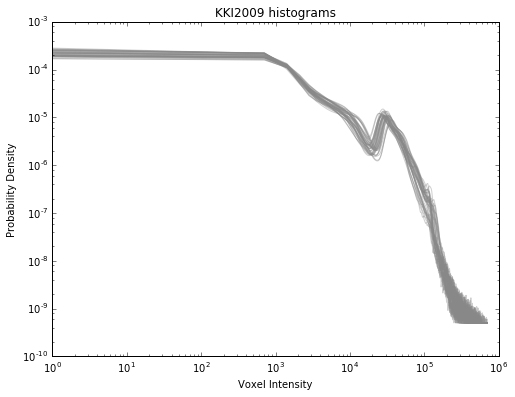

X-Min: 0.0
X-Max: 702970.4375


In [2]:
kki2009 = histogram_windowing('./data/KKI2009_b0_pdfs.pkl','KKI2009')

## BNU1

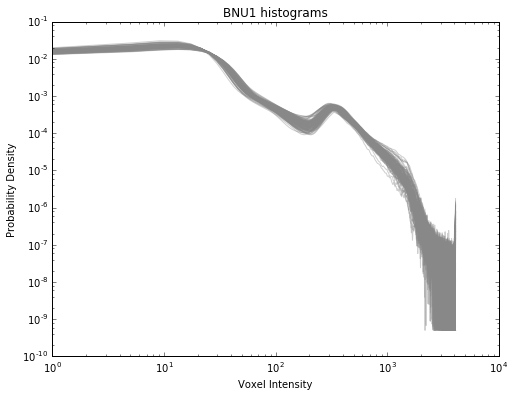

X-Min: 0.0
X-Max: 4095.0


In [3]:
bnu1 = histogram_windowing('./data/BNU1_b0_pdfs.pkl', 'BNU1')

## BNU3

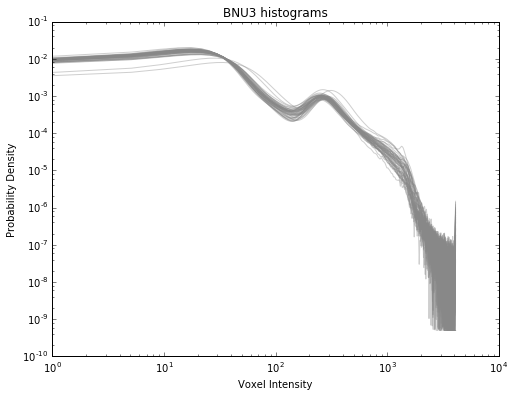

X-Min: 0.0
X-Max: 4095.0


In [4]:
bnu3 = histogram_windowing('./data/BNU3_b0_pdfs.pkl', 'BNU3')

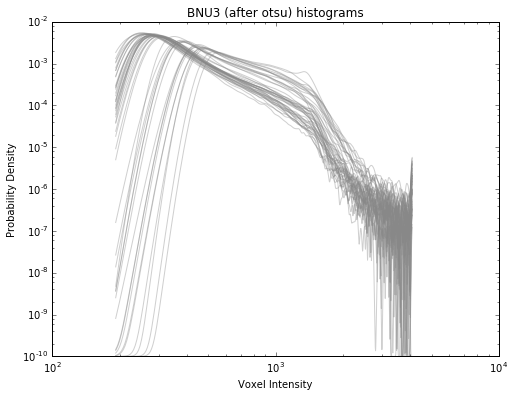

X-Min: 191.0
X-Max: 4095.0


In [5]:
bnu3 = histogram_windowing('./data/BNU3_otsu_b0_pdfs.pkl', 'BNU3 (after otsu)')

## NKI1

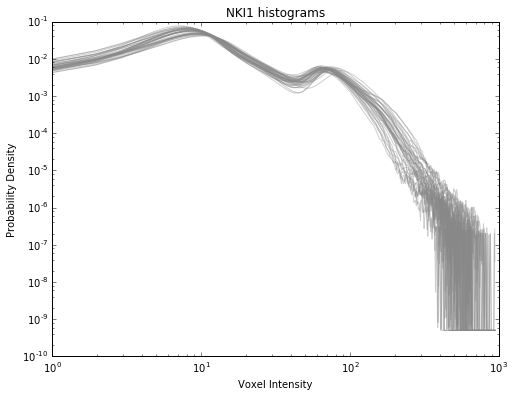

X-Min: 0.0
X-Max: 939.0


In [5]:
nki1 = histogram_windowing('./data/NKI1_b0_pdfs.pkl', 'NKI1')

## MRN114

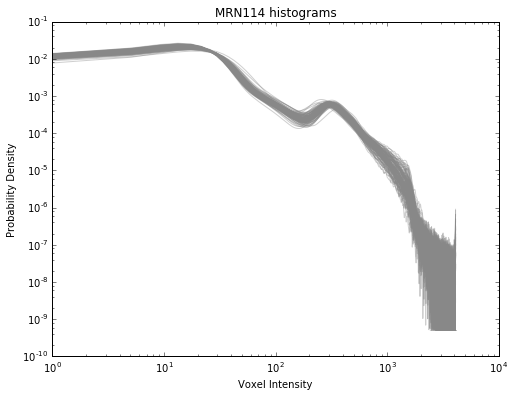

X-Min: 0.0
X-Max: 4095.0


In [6]:
mrn114 = histogram_windowing('./data/MRN114_b0_pdfs.pkl', 'MRN114')

## NKIENH

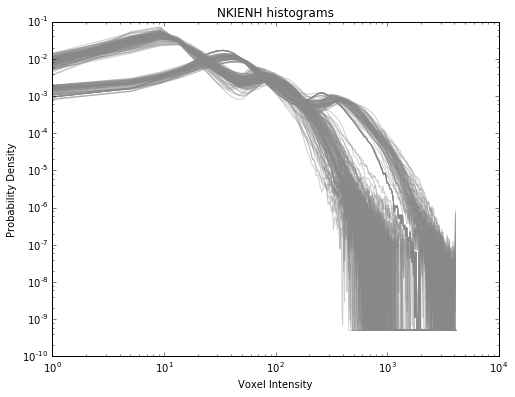

X-Min: 0.0
X-Max: 4095.0


In [7]:
nkienh = histogram_windowing('./data/NKIENH_b0_pdfs.pkl', 'NKIENH')

## SWU4

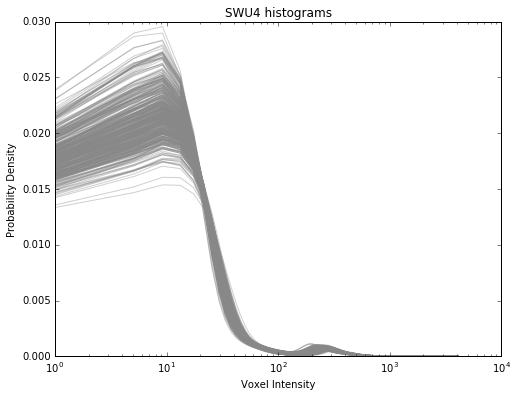

X-Min: 0.0
X-Max: 4095.0


In [8]:
swu4 = histogram_windowing('./data/SWU4_b0_pdfs.pkl', 'SWU4')

## MRN1313

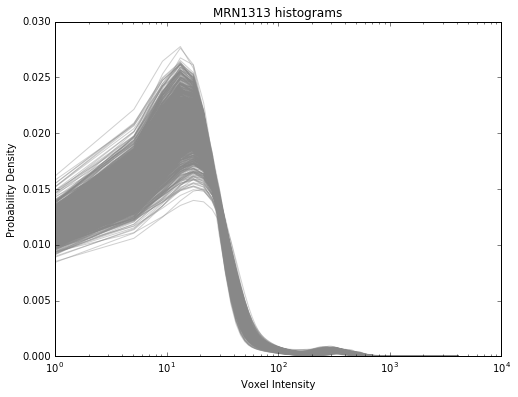

X-Min: 0.0
X-Max: 4095.0


In [9]:
mrn1313 = histogram_windowing('./data/MRN1313_b0_pdfs.pkl', 'MRN1313')

--------------

--------------

## Otsu's Method

In [2]:
from skimage.filters import threshold_otsu

In [3]:
datasets = list(('./.olddata/single_subj/BNU1', './.olddata/single_subj/BNU3', './.olddata/single_subj/HCP500',
                 './.olddata/single_subj/Jung2015', './.olddata/single_subj/KKI2009', './.olddata/single_subj/MRN114',
                 './.olddata/single_subj/NKI1', './.olddata/single_subj/NKIENH', './.olddata/single_subj/SWU4'))
files = list()
for f in datasets:
    files.append([f + '/' + single for single in os.listdir(f)])

----------
Scan: BNU1_0025864_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 62)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


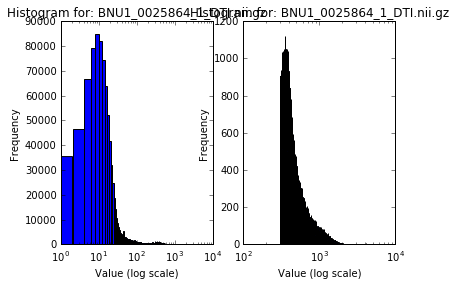

----------
Scan: BNU3_0027055_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 49)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


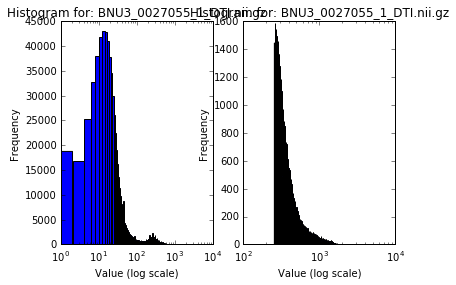

----------
Scan: HCP500_140117_96LR_DTI.nii.gz
Shape of B0 volume: (144, 168, 111)
Datatype: int16
Min: 0 (-32768)
Max: 31698 (32767)


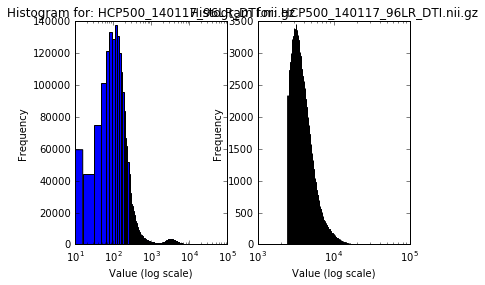

----------
Scan: Jung2015_M87100374_1_DTI.nii.gz
Shape of B0 volume: (104, 96, 66)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


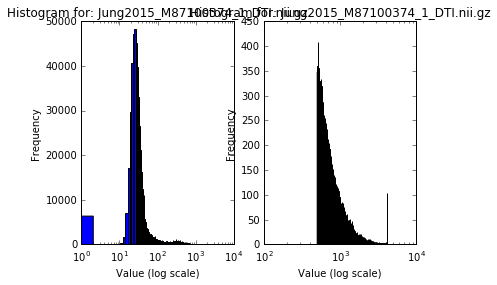

----------
Scan: KKI2009_113_1_DTI.nii
Shape of B0 volume: (256, 256, 65)
Datatype: float32
Min: 0.0 (-3.40282e+38)
Max: 552762.5 (3.40282e+38)


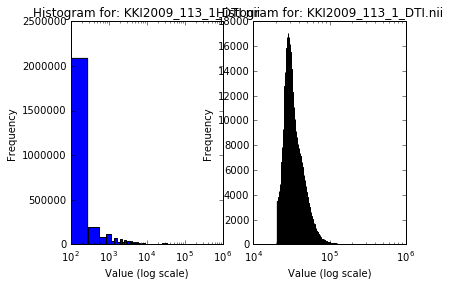

----------
Scan: MRN114_M87102217_1_DTI.nii
Shape of B0 volume: (128, 128, 72)
Datatype: int16
Min: 0 (-32768)
Max: 3949 (32767)


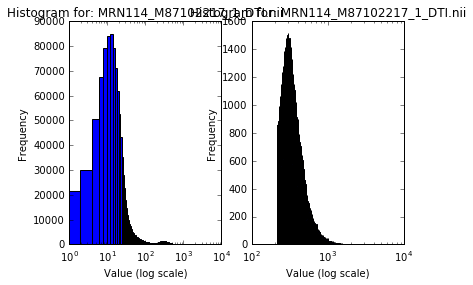

----------
Scan: NKI24_0021001_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 873 (32767)


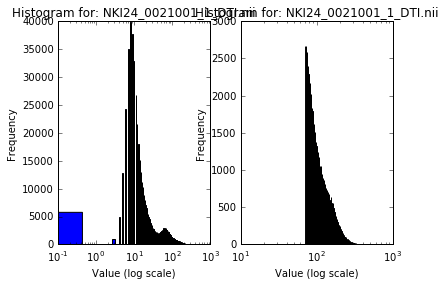

----------
Scan: NKIENH_0101084_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 1934 (32767)


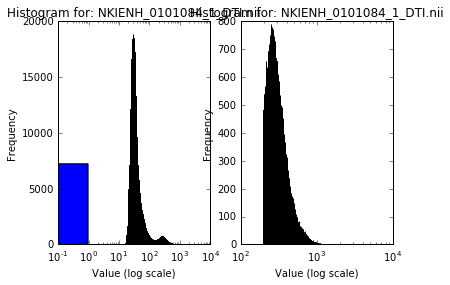

----------
Scan: SWU4_0025824_1_DTI.nii.gz
Shape of B0 volume: (128, 124, 60)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


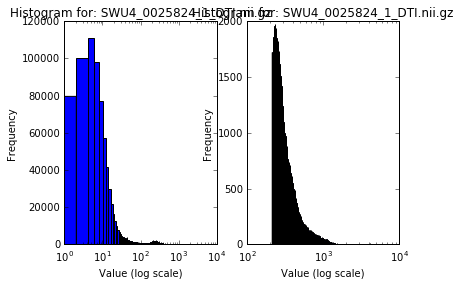

In [6]:
for scan in files:
    bval = np.loadtxt(scan[0])
    bval[np.where(bval==np.min(bval))] = 0
    im = nb.load(scan[2])
    b0_loc = np.where(bval==0)[0][0]
    dti = im.get_data()[:,:,:,b0_loc]

    print "----------"
    print "Scan: " + os.path.basename(scan[2])
    print "Shape of B0 volume: " + str(dti.shape)
    print "Datatype: " + str(dti.dtype)
    try:
        print "Min: " + str(dti.min()) + " (" + str(np.iinfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.iinfo(dti.dtype).max) + ")"
    except ValueError:
        print "Min: " + str(dti.min()) + " (" + str(np.finfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.finfo(dti.dtype).max) + ")"
    plt.subplot(121)
    plt.hist(np.ravel(dti), bins=2000) #adding 1 to prevent divide by 0
    plt.title('Histogram for: ' + os.path.basename(scan[2]))
    plt.xscale('log')
    plt.xlabel("Value (log scale)")
    plt.ylabel("Frequency")
    plt.subplot(122)
    thresh = threshold_otsu(dti)
    plt.hist(np.ravel([d for d in np.ravel(dti) if d > thresh]), bins=2000) #adding 1 to prevent divide by 0
    plt.title('Histogram for: ' + os.path.basename(scan[2]))
    plt.xscale('log')
    plt.xlabel("Value (log scale)")
    plt.ylabel("Frequency")
    plt.show()

## (Old method)

In [7]:
datasets = list(('./data/BNU1', './data/BNU3', './data/HCP500',
                 './data/Jung2015', './data/KKI2009', './data/MRN114',
                 './data/NKI1', './data/NKIENH', './data/SWU4'))
files = list()
for f in datasets:
    files.append([f + '/' + single for single in os.listdir(f)])

----------
Scan: BNU1_0025864_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 62)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


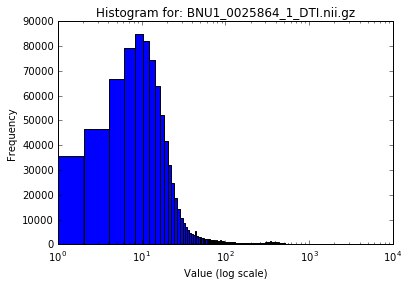

----------
Scan: BNU3_0027055_1_DTI.nii.gz
Shape of B0 volume: (128, 128, 49)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


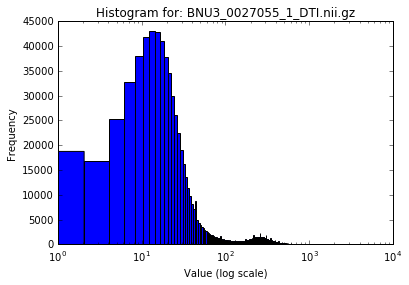

----------
Scan: HCP500_140117_96LR_DTI.nii.gz
Shape of B0 volume: (144, 168, 111)
Datatype: int16
Min: 0 (-32768)
Max: 31698 (32767)


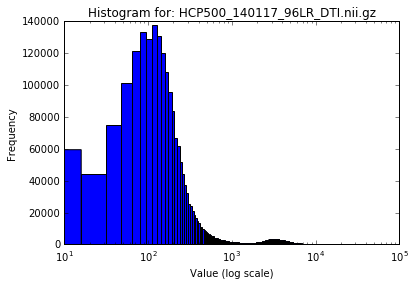

----------
Scan: Jung2015_M87100374_1_DTI.nii.gz
Shape of B0 volume: (104, 96, 66)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


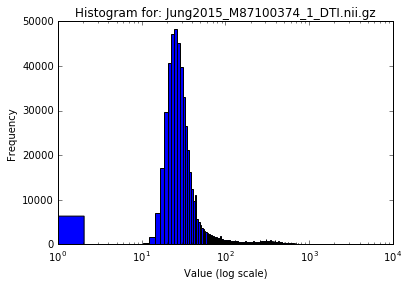

----------
Scan: KKI2009_113_1_DTI.nii
Shape of B0 volume: (256, 256, 65)
Datatype: float32
Min: 0.0 (-3.40282e+38)
Max: 552762.5 (3.40282e+38)


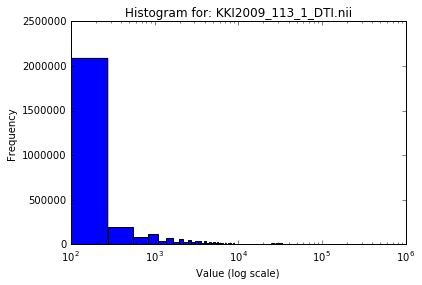

----------
Scan: MRN114_M87102217_1_DTI.nii
Shape of B0 volume: (128, 128, 72)
Datatype: int16
Min: 0 (-32768)
Max: 3949 (32767)


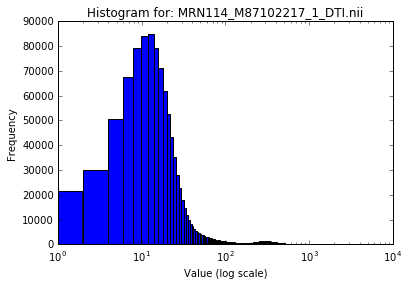

----------
Scan: NKI24_0021001_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 873 (32767)


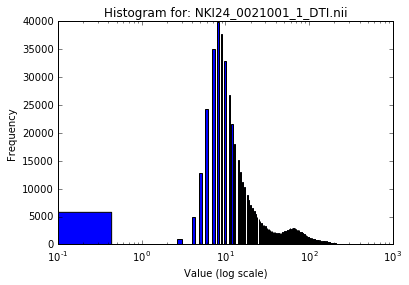

----------
Scan: NKIENH_0101084_1_DTI.nii
Shape of B0 volume: (106, 90, 64)
Datatype: int16
Min: 0 (-32768)
Max: 1934 (32767)


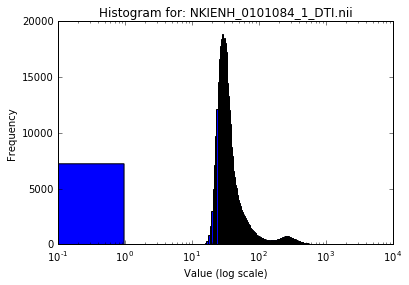

----------
Scan: SWU4_0025824_1_DTI.nii.gz
Shape of B0 volume: (128, 124, 60)
Datatype: int16
Min: 0 (-32768)
Max: 4095 (32767)


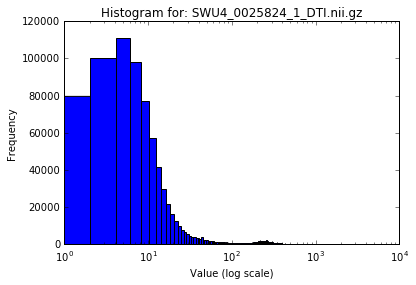

In [8]:
for scan in files:
    bval = np.loadtxt(scan[0])
    bval[np.where(bval==np.min(bval))] = 0
    im = nb.load(scan[2])
    b0_loc = np.where(bval==0)[0][0]
    dti = im.get_data()[:,:,:,b0_loc]

    print "----------"
    print "Scan: " + os.path.basename(scan[2])
    print "Shape of B0 volume: " + str(dti.shape)
    print "Datatype: " + str(dti.dtype)
    try:
        print "Min: " + str(dti.min()) + " (" + str(np.iinfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.iinfo(dti.dtype).max) + ")"
    except ValueError:
        print "Min: " + str(dti.min()) + " (" + str(np.finfo(dti.dtype).min) + ")"
        print "Max: " + str(dti.max()) + " (" + str(np.finfo(dti.dtype).max) + ")"

    plt.hist(np.ravel(dti), bins=2000) #adding 1 to prevent divide by 0
    plt.title('Histogram for: ' + os.path.basename(scan[2]))
    plt.xscale('log')
    plt.xlabel("Value (log scale)")
    plt.ylabel("Frequency")
    plt.show()